# استخراج عبارت اسمی از متن



In [1]:
#وارد کردن کتابخانه
import nltk
from textblob import TextBlob


In [2]:
#استخراج اسم
blob = TextBlob("John is learning natural language processing")
for np in blob.noun_phrases:
    print(np)


john
natural language processing


# شباهت سنجی میان متن ها

In [3]:
#گام اول: ساخت یک سند

documents = ( "I like NLP", "I am exploring NLP", "I am a beginner in NLP", "I want to learn NLP", "I like advanced NLP" )


In [4]:
#گام دوم: تحلیل شباهت سنجی میان جملات

#وارد کردن کتابخانه
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#محاسبه tf-idf (مهندسی ویژگی)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_matrix.shape



(5, 10)

In [5]:
#محاسبه میزان شباهت جمله اول با دیگر جملات سند
cosine_similarity(tfidf_matrix[0:1],tfidf_matrix)


array([[1.        , 0.17682765, 0.14284054, 0.13489366, 0.68374784]])

# Part of speech (POS) tagging
#Part of speech (POS) tagging is another crucial part of natural language processing that involves labeling the words with a part of speech such as noun, verb, adjective, etc. POS is the base for Named Entity Resolution, Sentiment Analysis, Question Answering, and Word Sense Disambiguation


In [6]:
#ذخیره سازی متن در یک متغیر

Text  =  "I love NLP and I will learn NLP in 2 month"

In [7]:
#بردازش زبان طبیعی برای pos
#اجرای کد
# وارد کردن پکیج های مهم و stopword ها
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
#کردن متن Tokenize 
tokens = sent_tokenize(Text)
#تولید برچسب برای تمام توکن ها در لوپ
for i in tokens: 
    words = nltk.word_tokenize(i)
    words = [w for w in words if not w in stop_words] 
    #کردن  POS-tagger 
    tags = nltk.pos_tag(words)
tags



[('I', 'PRP'),
 ('love', 'VBP'),
 ('NLP', 'NNP'),
 ('I', 'PRP'),
 ('learn', 'VBP'),
 ('NLP', 'RB'),
 ('2', 'CD'),
 ('month', 'NN')]

#  استخراج اسامی خاص از متن



In [3]:
sent = "John is studying at Stanford University in California"
 

In [4]:

#استفاده از NLTK
#وارد کردن کتابخانه

import nltk

from nltk import ne_chunk

from nltk import word_tokenize




In [5]:
shahin= ne_chunk (nltk.pos_tag(word_tokenize(sent)), binary=False)
print(shahin.__repr__())


Tree('S', [Tree('PERSON', [('John', 'NNP')]), ('is', 'VBZ'), ('studying', 'VBG'), ('at', 'IN'), Tree('ORGANIZATION', [('Stanford', 'NNP'), ('University', 'NNP')]), ('in', 'IN'), Tree('GPE', [('California', 'NNP')])])


# طبقه بندی پیامک ها با استفاده از یادگیری ماشین و کشف علت اسپم بودن / نبودن ها 


In [1]:
#خواندن دیتا
import pandas as pd
Email_Data = pd.read_csv("C:\\Users\\ShahinN\\Desktop\\SMSSpamCollection.txt", sep= '\t', header=None, names=["Target", "Email"])

Email_Data.columns

 

Index(['Target', 'Email'], dtype='object')

In [2]:
Email_Data.head()


,Target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#Step 6-2 Text processing and feature engineering

#The code is below:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, naive_bayes, metrics



# پیش پردازش متن دیتاست (پیامک ها)

In [4]:
#pre processing steps like lower case, stemming and lemmatization
Email_Data['Email'] =  Email_Data['Email'].apply(lambda x:  " ".join(x.lower() for x in x.split()))
# stopword filtering
stop = stopwords.words('english')
Email_Data['Email'] =  Email_Data['Email'].apply(lambda x: " ".join (x for x in x.split() if x not in stop))
#stemming
st = PorterStemmer()
Email_Data['Email'] =  Email_Data['Email'].apply(lambda x: " ".join ([st.stem(word) for word in x.split()]))
#lemmatize
Email_Data['Email'] =  Email_Data['Email'].apply(lambda x: " ".join ([Word(word).lemmatize() for word in x.split()]))
Email_Data.head()


,Target,Email
0,ham,"go jurong point, crazy.. avail bugi n great wo..."
1,ham,ok lar... joke wif u oni...
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor... u c alreadi say...
4,ham,"nah think goe usf, live around though"


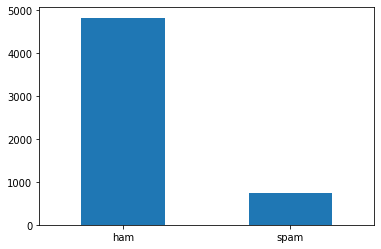

In [5]:
result=Email_Data['Target'].value_counts()
result.plot(kind='bar', rot=0);
 
 

In [6]:
# sampling
spam = Email_Data[Email_Data['Target'] == 'spam'].sample(n=700)
ham = Email_Data[Email_Data['Target'] == 'ham'].sample(n=700)


In [7]:
Email_sample = pd.concat([spam, ham],axis=0)

In [8]:
Email_sample.head()

,Target,Email
3988,spam,rington club: gr8 new poli direct mobil everi ...
983,spam,congrats! 2 mobil 3g videophon r yours. call 0...
2583,spam,3 free tarot texts! find love life now! tri 3 ...
5462,spam,txt: call no: 86888 & claim reward 3 hour talk...
2308,spam,win year suppli cd 4 store ur choic worth £500...


In [9]:
from wordcloud import WordCloud 
from wordcloud import STOPWORDS


In [10]:
spam =  Email_sample[Email_sample['Target'] == 'spam']
ham =  Email_sample[Email_sample['Target'] == 'ham']

In [11]:
spam_str = spam.Email.str.cat()
ham_str = ham.Email.str.cat()

In [12]:
wordcloud_spam =  WordCloud(background_color='white').generate (spam_str)


Text(0.5, 1.0, 'why detected as spam')

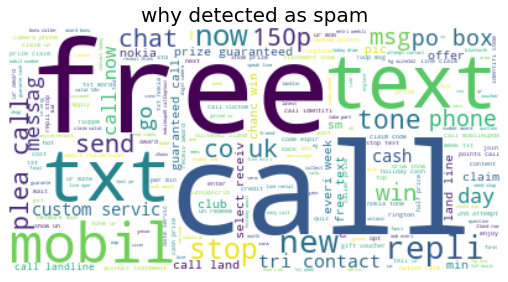

In [13]:
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_spam,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('why detected as spam',fontsize=20)
 

In [14]:
wordcloud_ham =  WordCloud(background_color='black').generate (ham_str)

Text(0.5, 1.0, 'why detected as ham')

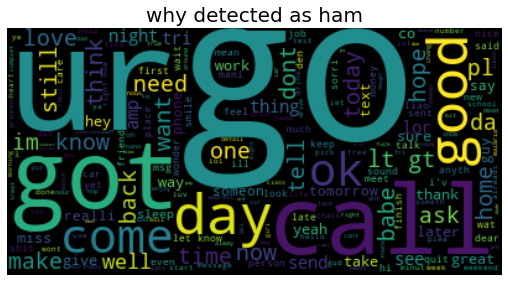

In [15]:
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_ham,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('why detected as ham',fontsize=20)

In [16]:
#Splitting data into train and validation
x_Train, x_Test, y_Train, y_Test = train_test_split(Email_Data['Email'], Email_Data['Target'], test_size = 0.2, random_state = 0)




In [17]:
# TFIDF feature generation for a maximum of 5000 features
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(y_Train)
valid_y = encoder.fit_transform(y_Test)


In [18]:
tfidf_vect =  TfidfVectorizer(analyzer='word',  token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(Email_Data['Email'])
xtrain_tfidf =  tfidf_vect.transform(x_Train)
xvalid_tfidf =  tfidf_vect.transform(x_Test)

                                    

In [19]:
xtrain_tfidf.data


array([0.33613851, 0.63616046, 0.30807392, ..., 0.22444461, 0.32713575,
       0.30759277])

In [20]:

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    return metrics.accuracy_score(predictions, valid_y)



In [21]:
# Naive Bayes trainig
accuracy = train_model(naive_bayes.MultinomialNB(alpha=0.2), xtrain_tfidf, train_y, xvalid_tfidf)
print ("Accuracy: ", accuracy)


Accuracy:  0.989237668161435


In [22]:
# Linear Classifier on Word Level TF IDF Vectors
from sklearn import linear_model
accuracy =  train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf) 
print ("Accuracy: ", accuracy)


C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy:  0.9632286995515695


# انجام تحلیل احساسات



In [6]:
#مثال:
review = "I like this phone. screen quality and camera clarity is really good." 
review2 =  "This tv is not good. Bad quality, no clarity, worst experience"

In [7]:
#وارد کردن کتابخانه
from textblob import TextBlob


In [8]:
#شامل یک مدل پیش بینی کننده از پیش آموزش داده شده برای تحلیل احساسات است TextBlob

# تحلیل احساسات کاربر اول
blob = TextBlob(review)
blob.sentiment


Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [9]:
#تحلیل احساسات کاربر دوم
blob = TextBlob(review2)
blob.sentiment


Sentiment(polarity=-0.6833333333333332, subjectivity=0.7555555555555555)

# تشخیص معنی واژه در جملات مختلف


In [10]:
Text1 = 'I went to the bank to deposit my money'
Text2 = 'The river bank was full of dead fishes'


In [11]:
#ابتدا کتابخانه ها و توابع را وارد میکنیم:
#Install pywsd
#!pip install pywsd
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer
from itertools import chain
from pywsd.lesk import simple_lesk
 

Warming up PyWSD (takes ~10 secs)... took 27.942233324050903 secs.


In [12]:

# جملات
bank_sents = ['I went to the bank to deposit my money', 'The river bank was full of dead fishes']
# استفاده از تابع lesk 
print ("Context-1:", bank_sents[0])
answer = simple_lesk(bank_sents[0],'bank')
print ("Sense:", answer)
print ("Definition : ", answer.definition())
print ("Context-2:", bank_sents[1])
answer = simple_lesk(bank_sents[1],'bank','n')
print ("Sense:", answer) 
print ("Definition : ", answer.definition())



Context-1: I went to the bank to deposit my money
Sense: Synset('depository_financial_institution.n.01')
Definition :  a financial institution that accepts deposits and channels the money into lending activities
Context-2: The river bank was full of dead fishes
Sense: Synset('bank.n.01')
Definition :  sloping land (especially the slope beside a body of water)


# ساخت سیستم ترجمه


In [13]:
#pip install goslate
import goslate
text = "I am a data scientist in insurance"
 

In [14]:
#ساخت تابع ترجمه:
gs = goslate.Goslate()
translatedText = gs.translate(text,'fa')
print(translatedText)

من یک دانشمند داده ها در بیمه هستم
